# LT 3 (Final Version)
v1.01  
*Changes: edited the text in 3a)*

#### Instructor

Joseph Benjamin R. Ilagan  
ITMGT 25 EE

#### Group Members:
    
1)  Ralph de Leon
2)  Elyssa Mendoza
3)  Joachim Malabanan
4)  Bernice Palaran
5)  Jaden Sarmiento

Please submit through your group's Github Repository on or before **Thursday, 25 July 2019**, at **1:00PM**. 

Submission time be based on the email I will receive indicating that you have already uploaded your work for checking. 

If I don't receive any email from you, I will not check your answers. Any work submitted after **3:00 PM** will not be checked. Also, any work submitted after 1:00PM will have a maximum grade of 180 (out of the 200 total for the whole exam).

This time, I will not consider the timestamps in the repository as basis.

## Exploratory Data Analysis of Spotify track popularity in the Philippines

We will explore Spotify Philippines Top Hits data over the past year.

Spotify has made data available to the public through dedicated websites (for Charts) and through their Developer APIs.

Comma-Separated Value (CSV) files containing weekly Top 200 tracks from the [Spotify Charts](https://spotifycharts.com/regional/ph/weekly/latest) site have been downloaded for you and could be found in the **spotify_data** subdirectory.

### 1) Setup

Let's get a list of these csv files. Run the next two cells below.

In [595]:
import os
import re

In [596]:
file_dir = "./spotify_data"
file_list = os.listdir(file_dir)

#Filter to only .csv files
file_list = [f for f in filter(lambda x: re.search(r"\.csv$", x) , file_list)]

#Add directory prefix
file_list = [file_dir+"/"+f for f in file_list]
file_list

['./spotify_data/regional-ph-weekly-2018-08-03--2018-08-10.csv',
 './spotify_data/regional-ph-weekly-2018-08-17--2018-08-24.csv',
 './spotify_data/regional-ph-weekly-2018-09-21--2018-09-28.csv',
 './spotify_data/regional-ph-weekly-2019-02-01--2019-02-08.csv',
 './spotify_data/regional-ph-weekly-2019-05-24--2019-05-31.csv',
 './spotify_data/regional-ph-weekly-latest.csv',
 './spotify_data/regional-ph-weekly-2018-11-16--2018-11-23.csv',
 './spotify_data/regional-ph-weekly-2018-12-28--2019-01-04.csv',
 './spotify_data/regional-ph-weekly-2018-11-23--2018-11-30.csv',
 './spotify_data/regional-ph-weekly-2019-02-22--2019-03-01.csv',
 './spotify_data/regional-ph-weekly-2019-04-19--2019-04-26.csv',
 './spotify_data/regional-ph-weekly-2019-05-03--2019-05-10.csv',
 './spotify_data/regional-ph-weekly-2019-06-14--2019-06-21.csv',
 './spotify_data/regional-ph-weekly-2018-12-07--2018-12-14.csv',
 './spotify_data/regional-ph-weekly-2019-03-01--2019-03-08.csv',
 './spotify_data/regional-ph-weekly-2019-

We shall now load all csvs as one dataframe. Run the next few cells below.

In [597]:
import pandas as pd

In [598]:
# exclude first row per file
def load_csv(file_name):
    df = pd.read_csv(file_name, skiprows=1)
    df["file_name"] = file_name
    return df
    
df = pd.concat(map(load_csv, file_list))

In [599]:
df.head()

Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  
4  ./spotify_data/regional-ph-weekly-2018-08-03--...

In [600]:
df.tail()

Position                  Track Name            Artist  Streams  \
195       196  Rumors (with Sofia Carson)             R3HAB   143865   
196       197           Never Be the Same    Camila Cabello   143720   
197       198              Meron Nang Iba  Silent Sanctuary   143468   
198       199              Sunday Morning          Maroon 5   143314   
199       200               What is Love?             TWICE   143116   

                                                   URL  \
195  https://open.spotify.com/track/4hIhoGN4UTZdNpH...   
196  https://open.spotify.com/track/4eWQlBRaTjPPUlz...   
197  https://open.spotify.com/track/4r7vGTk9HCW7YDo...   
198  https://open.spotify.com/track/5qII2n90lVdPDcg...   
199  https://open.spotify.com/track/5Ek40FyMPprcvty...   

                                             file_name  
195  ./spotify_data/regional-ph-weekly-2018-09-14--...  
196  ./spotify_data/regional-ph-weekly-2018-09-14--...  
197  ./spotify_data/regional-ph-weekly-2018-09-14--...  
198  ./spotify_data/regional-ph-weekly-2018-09-14--...  
199  ./spotify_data/regional-ph-weekly-2018-09-14--...

In [601]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name'], dtype='object')

Note that the csv files don't have a lot of information in them.

Extract the beginning and ending days (yyyy-mm-dd) of the week as found in the file name.

The file names do have some bits of information we can use later. We can extract beginning and ending days of the week. Let's do that now. Run the cell below.

In [602]:
# Get beginning and ending days (yyyy-mm-dd) of the week as found in the file name
extracted_df = df.loc[:,"file_name"].str.extract(r"([0-9]{4}\-[0-9]{2}\-[0-9]{2})\--([0-9]{4}\-[0-9]{2}\-[0-9]{2})")
extracted_df.columns = ["begin_date","end_date"]
extracted_df.head()

begin_date    end_date
0  2018-08-03  2018-08-10
1  2018-08-03  2018-08-10
2  2018-08-03  2018-08-10
3  2018-08-03  2018-08-10
4  2018-08-03  2018-08-10

Add this new dataframe to the existing one. Go ahead and run the next cell.

In [603]:
#Add new columns to dataframe
df = pd.concat([df,extracted_df],axis=1)
df.head()

Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  begin_date    end_date  
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
4  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10

Notice the two new columns `begin_date` and `end_date` to the right of the dataframe.

#### 1a) Extract Track IDs

Spotify tracks are assigned a Track ID, which can be seen embedded in the URL data above. 

The hash-looking characters to the right of "https://open.spotify.com/track/" are the Track IDs. These are what we will extract next.

**Your turn:**

Let's extract that into its own column called **"Track ID"** in the dataframe.

**(10 points)**

In [604]:
## write your code below.
## remnants of tests from the previous run are shown on the output area for your reference.
df.loc[:,"URL"].replace(r"^https\:\/\/open\.spotify\.com\/track\/","",regex=True)



0      2G7V7zsVDxg1yRsu7Ew9RJ
1      7fa9MBXhVfQ8P8Df9OEbD8
2      4u8RkgV6P4TLi89SmlUtv8
3      4gB61mP4tNChn4LgfquMhi
4      3WUEs51GpcvlgU7lehLgLh
5      2BgD4nRyx9EZ5o8YEnjRSV
6      3VQb0rq27GPX92X53Ni1Lc
7      6SFStUDQZNaGPKWOx9ZiJB
8      5WvAo7DNuPRmk4APhdPzi8
9      2CWnuF7ht55Ajyeg4WPvWu
10     0ztDBQdQmdVZvorSmIjMih
11     3u1S1OmAUhx5DRlLrXqyp3
12     0d2iYfpKoM0QCKvcLCkBao
13     00mBzIWv5gHOYxwuEJXjOG
14     7gkWXbAxIYuvtOpcN3p9GJ
15     4Is1b37KJY9XVCgzp81FBW
16     3BPoSr2pO34Aan6alFfVto
17     4keoy2fqgwGnbWlm3ZVZFa
18     3nc420PXjTdBV5TN0gCFkS
19     10Igtw8bSDyyFs7KIsKngZ
20     04ZTP5KsCypmtCmQg5tH9R
21     6LJ1p1h5EcMK4VPeCLDSoF
22     4hQ6UGyWQIGJmHSo0J88JW
23     76cy1WJvNGJTj78UqeA5zr
24     0WOvSEVpUGkNufX0w0M06F
25     2RttW7RAu5nOAfq6YFvApB
26     09IStsImFySgyp0pIQdqAc
27     6NFKf8vBApSvtzkapYmnVR
28     3T4UodGkfZObJ43RtA5KFU
29     6kPJZM97LwdG9QIsT7khp6
                ...          
170    6lanRgr6wXibZr8KgzXxBl
171    6qAzAmPBUpGrk7XADZHR5k
172    57k

In [605]:
## check your work here
## remnants of the output from a previous run are shown below for reference

df["Track ID"]=df.loc[:,"URL"].replace(r"^https\:\/\/open\.spotify\.com\/track\/","",regex=True)

df


Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

### 2) Working with Master Data

We need more detailed information about the things of significance we are analyzing. In particular, we need to know more about the individual tracks (including audio features such as energy, danceability, or speechiness) and artists (including name and genres). 

Spotify provides an Application Programming Interface (API) to allow software developers to access these pieces of information through web services. 

We've previously used these APIs to extract master data based on the specific tracks found in the PH Top 200 weekly data loaded in the dataframe above. 

We shall now load tracks from JSON file **tracks.json**. The data was previously extracted via the Spotify Web API.

The keys and values are taken from the [Spotify Web API Documentation Page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>album</td>
      <td>a simplified <a href="/documentation/web-api/reference/object-model/#album-object-simplified">album object</a></td>
      <td>The album on which the track appears. The album object includes a link in <code class="highlighter-rouge">href</code> to full information about the album.</td>
    </tr>
    <tr>
      <td>artists</td>
      <td>an array of simplified <a href="/documentation/web-api/reference/object-model/#artist-object-simplified">artist objects</a></td>
      <td>The artists who performed the track. Each artist object includes a link in <code class="highlighter-rouge">href</code> to more detailed information about the artist.</td>
    </tr>
    <tr>
      <td>available_markets</td>
      <td>array of strings</td>
      <td>A list of the countries in which the track can be played, identified by their <a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">ISO 3166-1 alpha-2</a> code.</td>
    </tr>
    <tr>
      <td>disc_number</td>
      <td>integer</td>
      <td>The disc number (usually <code class="highlighter-rouge">1</code> unless the album consists of more than one disc).</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>integer</td>
      <td>The track length in milliseconds.</td>
    </tr>
    <tr>
      <td>explicit</td>
      <td>Boolean</td>
      <td>Whether or not the track has explicit lyrics ( <code class="highlighter-rouge">true</code> = yes it does; <code class="highlighter-rouge">false</code> = no it does not OR unknown).</td>
    </tr>
    <tr>
      <td>external_ids</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-id-object">external ID object</a></td>
      <td>Known external IDs for the track.</td>
    </tr>
    <tr>
      <td>external_urls</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-url-object">external URL object</a></td>
      <td>Known external URLs for this track.</td>
    </tr>
    <tr>
      <td>href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify ID</a> for the track.</td>
    </tr>
    <tr>
      <td>is_playable</td>
      <td>boolean</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied. If <code class="highlighter-rouge">true</code> , the track is playable in the given market. Otherwise <code class="highlighter-rouge">false</code>.</td>
    </tr>
    <tr>
      <td>linked_from</td>
      <td>a <a href="/documentation/web-api/reference/object-model/#track-link">linked track object</a></td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, and the requested track has been replaced with different track. The track in the <code class="highlighter-rouge">linked_from</code> object contains information about the originally requested track.</td>
    </tr>
    <tr>
      <td>restrictions</td>
      <td>a restrictions object</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, the original track is not available in the given market, and Spotify did not have any tracks to relink it with. The track response will still contain metadata for the original track, and a restrictions object containing the reason why the track is not available: <code class="highlighter-rouge">"restrictions" : {"reason" : "market"}</code></td>
    </tr>
    <tr>
      <td>name</td>
      <td>string</td>
      <td>The name of the track.</td>
    </tr>
    <tr>
      <td>popularity</td>
      <td>integer</td>
      <td>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.<br />The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.<br />Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.</td>
    </tr>
    <tr>
      <td>preview_url</td>
      <td>string</td>
      <td>A link to a 30 second preview (MP3 format) of the track. Can be <code class="highlighter-rouge">null</code></td>
    </tr>
    <tr>
      <td>track_number</td>
      <td>integer</td>
      <td>The number of the track. If an album has several discs, the track number is the number on the specified disc.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “track”.</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify URI</a> for the track.</td>
    </tr>
  </tbody>
</table>

Let's go ahead and load these files.

In [606]:
import json

with open(file_dir+"/tracks.json","r") as tracks_file:
    tracks = json.load(tracks_file)

In [607]:
# display first 20 tracks only
tracks[:20]

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1ATL5GLyefJaxhQzSPVrLX'},
   'href': 'https://api.spotify.com/v1/albums/1ATL5GLyefJaxhQzSPVrLX',
   'id': '1ATL5GLyefJaxhQzSPVrLX',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/542d705154be4049fc927050d006987e63739bbd',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/239ec906572231368d8ebd72614094bd3bd10b33',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/f12257240bbec6ddfa780253ac939e646eba2a36',
     'width': 64}],
   'name': 'Scorpion',
   'release_date': '2018-06-29',
   'release_date_precision': 

Let's compare the **original_id** and the **id** of the track master data. You'll note that some entries don't match, and this may cause problems when you try cross-referencing what is included in Spotify Charts data and what's actually included in the API data. Go on, run the next cell.

In [608]:
[(t["original_id"],t["id"]) for t in tracks]

id_list = [(t["original_id"],t["id"]) for t in tracks]
id_list

[('2G7V7zsVDxg1yRsu7Ew9RJ', '2G7V7zsVDxg1yRsu7Ew9RJ'),
 ('7fa9MBXhVfQ8P8Df9OEbD8', '7fa9MBXhVfQ8P8Df9OEbD8'),
 ('4u8RkgV6P4TLi89SmlUtv8', '4u8RkgV6P4TLi89SmlUtv8'),
 ('4gB61mP4tNChn4LgfquMhi', '7GbAp0HKPQW7WnFJAzMoRk'),
 ('3WUEs51GpcvlgU7lehLgLh', '3WUEs51GpcvlgU7lehLgLh'),
 ('2BgD4nRyx9EZ5o8YEnjRSV', '2BgD4nRyx9EZ5o8YEnjRSV'),
 ('3VQb0rq27GPX92X53Ni1Lc', '6p6DiqAPwMX7vdrSo30wgo'),
 ('6SFStUDQZNaGPKWOx9ZiJB', '2BgEsaKNfHUdlh97KmvFyo'),
 ('5WvAo7DNuPRmk4APhdPzi8', '5WvAo7DNuPRmk4APhdPzi8'),
 ('2CWnuF7ht55Ajyeg4WPvWu', '7b8YOVV5quZcSKEijDgyWB'),
 ('0ztDBQdQmdVZvorSmIjMih', '0ztDBQdQmdVZvorSmIjMih'),
 ('3u1S1OmAUhx5DRlLrXqyp3', '3u1S1OmAUhx5DRlLrXqyp3'),
 ('0d2iYfpKoM0QCKvcLCkBao', '0d2iYfpKoM0QCKvcLCkBao'),
 ('00mBzIWv5gHOYxwuEJXjOG', '00mBzIWv5gHOYxwuEJXjOG'),
 ('7gkWXbAxIYuvtOpcN3p9GJ', '5OCJzvD7sykQEKHH7qAC3C'),
 ('4Is1b37KJY9XVCgzp81FBW', '4Is1b37KJY9XVCgzp81FBW'),
 ('3BPoSr2pO34Aan6alFfVto', '3BPoSr2pO34Aan6alFfVto'),
 ('4keoy2fqgwGnbWlm3ZVZFa', '4keoy2fqgwGnbWlm3ZVZFa'),
 ('3nc420P

#### 2a) Create a dictionary `tracks_dict` whose keys are the track ids (with attribute "id") and the values are dictionaries with the following attributes and values:

We need a fast, in-memory placeholder of tracks data where we could simply reference additional track attributes via some key (in our specific case, the Track ID, or rather, the Original ID). In Python, this can be achieved through a **dictionary**.

Recall that dictionaries can have subdictionaries in them. Create a dictionary whose keys are the original ids and the values are dictionaries containing the following attributes:

- "name" (Track Name)
- "duration_ms" (Duration in Milliseconds)
- "artist_id" (ID of the first artist in a list of artists)
- "artist_name" (Name of the first artist in a list of artists)

**(20 points)**


In [609]:
tracks_dict = {}

## write code below
## remnants from previous run are shown on the output below for your reference
## -----------------

for i in range(0,len(tracks)):
    name = tracks[i]["album"]["artists"][0]["name"]
    seconds = tracks[i]["duration_ms"]
    i_d = tracks[i]["artists"][0]["id"]
    track_name = tracks[i]["name"]
    og_id = id_list[i][0]
    tracks_dict.update({og_id:{"name":track_name,"id":og_id,"duration_ms":seconds,"artist_id":i_d,"artist_name":name}})
   

In [611]:
# display tracks_dict to verify changes
## remnants from previous run shown below for your reference

## write code below
## ----------------
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '4gB61mP4tNChn4LgfquMhi',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

---  


We will now load tracks from JSON file **audio_features.json**. The data was previously extracted via the Spotify Web API. The keys and values are taken from the description in the [Spotify Web API documentation page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). 

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>acousticness</td>
      <td>float</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
    </tr>
    <tr>
      <td>analysis_url</td>
      <td>string</td>
      <td>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>float</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>int</td>
      <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>float</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The Spotify ID for the track.</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>float</td>
      <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
    </tr>
    <tr>
      <td>key</td>
      <td>int</td>
      <td>The key the track is in. Integers map to pitches using standard <a href="https://en.wikipedia.org/wiki/Pitch_class">Pitch Class notation</a> . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>float</td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>float</td>
      <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>int</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>float</td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>float</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>int</td>
      <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
    <tr>
      <td>track_href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “audio_features”</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The Spotify URI for the track.</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>float</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
  </tbody>
</table>

Let's proceed with running the next few cells.

In [612]:
import json

with open(file_dir+"/audio_features.json","r") as audio_features_file:
    audio_features = json.load(audio_features_file)

In [613]:
audio_features[:20]

[{'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 {'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.568,
  'instrumentalness': 0,
  'liveness': 0.13,
  'valence': 0.448,
  'tempo': 124.959,
  'type': 'audio_features',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'uri': 'spotify:track:7fa9MBXhVfQ8P8Df9OEbD8',
  'track_href': 'https://api.spotify.com/v1/tracks/7fa9MBXhVfQ8P8Df9OE

#### 2b) Add audio features attributes to `tracks_dict`

For convenience, we shall update the `tracks_dict` dictionary with more attributes from the audio_features data we just uploaded.

Use the key 'original_id' as basis to update tracks_dict. Note that the `audio_features` dictionary entries also have the 'original_id' key so use that.

**Hint:** one way to do this is through the use of the `dict.update()` method. If we were not able to cover this in class, now is the time to do research.

**(10 points)**

In [614]:
tracks_dict["2G7V7zsVDxg1yRsu7Ew9RJ"]

{'name': 'In My Feelings',
 'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
 'duration_ms': 217925,
 'artist_id': '3TVXtAsR1Inumwj472S9r4',
 'artist_name': 'Drake'}

In [615]:
## write code below
## --------------------


for i in range (0,len(tracks)):
    sound = audio_features[i]
    loop_dict = tracks_dict[id_list[i][0]]
    loop_dict.update(sound)










In [616]:
# inspect tracks_dict to determine if the audio_features attributes have been carried over
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

After running the previous cell, you should notice the new subdictionary attributes included.

In [617]:
len(tracks_dict)

794

The number of tracks is visibly lower than the number of records we uploaded from the Charts data. This is understandable as we are now working with unique (original) Track IDs.

Finally, we will now load tracks from JSON file **artists.json**. The data was previously extracted via the Spotify Web API. Go ahead and run the next few cells.

In [618]:
import json

with open(file_dir+"/artists.json","r") as artists_file:
    artists = json.load(artists_file)

Let's take a look at the first 5 entries:

In [619]:
artists[:5]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ydoSd3N2mwgwBHtF6K7eX'},
  'followers': {'href': None, 'total': 1349550},
  'genres': ['australian pop', 'pop'],
  'href': 'https://api.spotify.com/v1/artists/6ydoSd3N2mwgwBHtF6K7eX',
  'id': '6ydoSd3N2mwgwBHtF6K7eX',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/1134c6cc39953feb998c83d5a7356ce6d1548a5c',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/87e98ba41d0405dd4a0a5aeca6f5f1ffea5a29bf',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/c016cd05bbb2e12a1e5d6d40e6e38f27363eb038',
    'width': 160}],
  'name': 'Calum Scott',
  'popularity': 78,
  'type': 'artist',
  'uri': 'spotify:artist:6ydoSd3N2mwgwBHtF6K7eX'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5qRSs6mvI17zrkJpOHkCoM'},
  'followers': {'href': None, 'total': 1907419},
  'genres': ['k-pop', 'k-pop boy group'],
  'href': 'https://api.spotify.com/v1/artists/5qRSs6mvI17z

#### 2c) Create a dictionary `artists_dict` whose keys are the artist ids (with attribute "id") and the values are dictionaries with the following attributes and values:

Similar to tracks, we need an easy mechanism to look up Artist master data simply by using the artist id as key.

Let's prepare a new dictionary `artists_dict` with the following attributes:

- "name" (Track Name)
- "genres" (Genres of the Artist)

Be careful to note that the value of `genres` is actually a list. This is perfectly fine in a dictionary setup, but be aware that there could be one or more genres attributed to each Artist.

**(10 points)**

In [620]:
artists_dict = {}

In [511]:
artists[0]["genres"]

['australian pop', 'pop']

In [512]:
artists[0]["id"]

'6ydoSd3N2mwgwBHtF6K7eX'

In [621]:
## write code below
## ------------------------

for i in range(0,len(artists)):
    name_artist = artists[i]["name"]
    id_artist = artists[i]["id"]
    genre_artist = artists[i]["genres"]
    artists_dict.update({id_artist:{"name": name_artist,"genres": genre_artist}})
   

Let's inspect the new dictionary:

In [516]:
## remnants from previous run shown below for your reference
artists_dict

{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

In [623]:
len(artists_dict)

304

#### 2d) Add **artist_genre** attribute per track in the tracks_dict dictionary. 

We are assuming for now that tracks inherit directly the genre from the artist and that no tracks deviate from the artist's general genre.

Again, for convenience, let's beef up tracks_dict with more attributes, this time from the artist data we just prepared. Assign a new attribute "artist_genre" in `tracks_dict`.

**Hint:** Note that `tracks_dict` has an "artist_id" attribute; use this to look up the attributes from `artists_dict`.


**(15 points)**

In [624]:
keys = list(tracks_dict.keys())
   

In [625]:
len(original_id_list)

794

In [626]:
## Write code below
## ----------------
original_id_list = list()
artist_id_list = list()


for i in range(len(tracks)):
    original_id = id_list[i][0]
    original_id_list.append(original_id)

for orig_id in original_id_list:
    artist_id = tracks_dict[orig_id]["artist_id"]
    artist_id_list.append(artist_id)

for orig_id in original_id_list:
    for art_id in artist_id_list:
        if ((tracks_dict[orig_id]["artist_id"]) == art_id):
             tracks_dict[orig_id].update({"artist_genres":artists_dict[art_id]['genres']})





In [627]:
len(tracks_dict)

794

In [628]:
len(original_id_list)

794

In [629]:
len(artists_dict)

304

#### 2e) Inspect **tracks_dict** and verify that the entries now have the 'artist_genres' property.

**(3 points)**

In [630]:
## remnants from previous run shown below for your reference

tracks_dict



{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genres': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [631]:
# verify that the length of tracks_dict is still the same
len(tracks_dict)

794

### 3) More Data Transformation: Feature Extractions and Aggregations

We shall revisit our original dataframe and introduce additional columns to make our analysis and insights easier in the succeeding numbers.

Let's display the head of the dataframe `df` here again. Go ahead and run the next cell.

In [632]:
df.head()

Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  begin_date    end_date  \
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
4  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   

                 Track ID  
0  2G7V7zsVDxg1yRsu7Ew9RJ  
1  7fa9MBXhVfQ8P8Df9OEbD8  
2  4u8RkgV6P4TLi89SmlUtv8  
3  4gB61mP4tNChn4LgfquMhi  
4  3WUEs51GpcvlgU7lehLgLh

In [535]:
type(df)

pandas.core.frame.DataFrame

#### 3a) Add audio feature columns to the dataframe  

Let's add the following:
* Genres ("artist_genres" key will be mapped to "genres")
* Danceability ("danceability")
* Energy ("energy")
* Loudness ("loudness")
* Mode ("mode")
* Speechiness ("speechiness")
* Acousticness ("acousticness")
* Instrumentalness ("instrumentalness")
* Liveness ("liveness")
* Valence ("valence")
* Tempo ("tempo")

  
We will use the Pandas `df.apply(...)` with a lambda function method to perform this task. 

We will create a new dataframe from the original one and then assign to new columns in the original dataframe.

**(15 points)**

In [633]:
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genres': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [634]:
df["genre"] = df.apply(lambda x: tracks_dict[x["Track ID"]]["artist_genres"], axis = 1).copy()
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [635]:
## write code below
## -------------------

df["danceability"] = df.apply(lambda x: tracks_dict[x["Track ID"]]["danceability"], axis = 1).copy()
df["energy"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["energy"]), axis = 1).copy()
df["loudness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["loudness"]), axis = 1).copy()
df["mode"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["mode"]), axis = 1).copy()
df["speechiness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["speechiness"]), axis = 1).copy()
df["acousticness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["acousticness"]), axis = 1).copy()
df["instrumentalness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["instrumentalness"]), axis = 1).copy()
df["liveness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["liveness"]), axis = 1).copy()
df["valence"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["valence"]), axis = 1).copy()
df["tempo"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["tempo"]), axis = 1).copy()
## -------------------

## remnants from previous run shown below for your reference
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [636]:
## write code below )to check the structure and length of the altered dataframe
## ----------------------------------------------------------------------------
df



Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [637]:
len(df)

10600

#### 3b) Extract genres
  
Prepare a tally board named `genre_tally_dict` that counts the number of streams of a particular genre across all tracks in the dataframe. Note that the **"genres"** column contains lists, so you may have to go through the elements of each list.

Make a copy of the dataframe.
  
**Be careful:** we are counting streams, not simple occurrences. We are accumulating stream counts, so you might get confused with a previous test or exercise involving word counts.

**(15 points)**

In [547]:
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [655]:
## write code below
## -------------------------

genre_tally_dict = {}

streams = list()
genre = list()

for strms in df.loc[:, "Streams"]:
    streams.append(strms)

for gnr in df.loc[:, "genre"]:
    genre.append(gnr)

print(genre[:5])




[['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap'], ['pop'], ['opm', 'pinoy indie', 'pinoy rock', 'pinoy trap'], ['la pop', 'pop'], ['opm', 'pinoy indie', 'pinoy rock']]


In [656]:
streamspergenre = []
genreperstream = []

for i in range(0, len(streams)):
    for j in range (0, len(genre[i])):
        streamspergenre.append(streams[i])
        genreperstream.append(genre[i][j])

print(streamspergenre[0:8])
print(genreperstream[0:8])

len(set(genreperstream))

[2019924, 2019924, 2019924, 2019924, 2019924, 2019924, 1364147, 1221053]
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap', 'pop', 'opm']


187

In [673]:
uniquegenre = set(genreperstream)

uniquegenre

{'acoustic opm',
 'acoustic pop',
 'adult standards',
 'album rock',
 'alternative metal',
 'alternative pop rock',
 'alternative r&b',
 'alternative rock',
 'american folk revival',
 'art rock',
 'atl hip hop',
 'atl trap',
 'australian dance',
 'australian pop',
 'baroque pop',
 'bedroom pop',
 'big band',
 'big room',
 'boy band',
 'brill building pop',
 'british indie rock',
 'british soul',
 'broadway',
 'brostep',
 'bubblegum pop',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian pop',
 'candy pop',
 'celtic rock',
 'channel pop',
 'chicago rap',
 'classic girl group',
 'classic opm',
 'classic rock',
 'complextro',
 'conscious hip hop',
 'contemporary country',
 'country',
 'country rap',
 'country road',
 'dance pop',
 'dance rock',
 'danish pop',
 'deep pop r&b',
 'deep talent show',
 'deep tropical house',
 'destroy techno',
 'detroit hip hop',
 'dfw rap',
 'dirty south rap',
 'disco',
 'dmv rap',
 'dutch house',
 'dutch pop',
 'easy listening',
 'edm',
 'electro

In [674]:
per = 0

#Initializing Count

for k in uniquegenre:
    genre_tally_dict[k] = 0


    
for k in genreperstream:
    genre_tally_dict[k] += int(streamspergenre[per])
    per += 1
     

In [675]:
genre_tally_dict

{'country rap': 13486448,
 'bubblegum pop': 171401,
 'uk contemporary r&b': 1026526,
 'urban contemporary': 40110205,
 'pinoy indie': 1035355791,
 'deep pop r&b': 3716431,
 'adult standards': 4353944,
 'latin': 2729284,
 'electropop': 134312100,
 'hip pop': 20907907,
 'lilith': 4932675,
 'indie poptimism': 31617620,
 'glam rock': 16349367,
 'rockabilly': 843024,
 'florida rap': 162204,
 'tropical house': 304517084,
 'tropical': 2353018,
 'complextro': 33005865,
 'miami hip hop': 19980279,
 'post-grunge': 21005676,
 'dutch house': 1195119,
 'k-pop boy group': 49379398,
 'pop': 1868747108,
 'lgbtq+ hip hop': 855855,
 'shiver pop': 1698610,
 'bedroom pop': 3339296,
 'destroy techno': 706692,
 'minnesota hip hop': 2532502,
 'album rock': 1158984,
 'deep tropical house': 1146231,
 'idol': 2148424,
 'dance rock': 1076469,
 'philly rap': 1493763,
 'jawaiian': 175794,
 'dirty south rap': 4079694,
 'mellow gold': 1215953,
 'pop rap': 142866738,
 'mexican pop': 376266,
 'celtic rock': 12027724,


In [676]:
len(df)

10600

We shall now prepare a new dataframe `genre_df` from `genre_tally_dict`. The code to do this has already been provided for you below, so go ahead and run the cell.

In [677]:
# you need to have successfully created genre_tally_dict for this to work
# remnants from previous run shown below for your reference
genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df.head()

genre       count
0          country rap    13486448
1        bubblegum pop      171401
2  uk contemporary r&b     1026526
3   urban contemporary    40110205
4          pinoy indie  1035355791

#### 3c) Sort genre dataframe by count in descending order

Make sure that changes to the sorting order are made in-place and that you reset the index.

**(2 points)**

In [678]:
## write code below
## -----------------

genre_df.sort_values(by = ["count"], axis = 0, ascending = False, inplace = True)

genre_df



genre       count
22                         pop  1868747108
157                        opm  1503883683
4                  pinoy indie  1035355791
52                   dance pop   975557841
70               post-teen pop   889830566
137                 pinoy rock   689103823
15              tropical house   304517084
90                 classic opm   295228389
152                        edm   254261140
138             pinoy pop punk   239302951
54                         rap   238282963
139                      k-pop   205860710
140                     la pop   195041003
119                     uk pop   191416023
82                    pop rock   177407313
95                         r&b   150393337
75                   pinoy r&b   144520211
36                     pop rap   142866738
8                   electropop   134312100
176           k-pop girl group   132214071
177           j-pop girl group   104150335
101                 pinoy trap    97028274
144                 neo mellow    94686600
179               pinoy reggae    87624888
129                   boy band    78444765
39                   viral pop    78400220
132                    dfw rap    74120346
175               canadian pop    68431051
108             australian pop    64587851
104              electro house    62407942
..                         ...         ...
172               gangster rap      514862
45                    atl trap      514862
79                manila sound      458036
186            tagalog worship      405757
151                  folk rock      380572
58                    art rock      380572
93                   latin pop      376266
37                 mexican pop      376266
103          indie electro-pop      375858
68        alternative pop rock      373689
160          singer-songwriter      342330
150  canadian contemporary r&b      321978
143               country road      193687
148                    country      193687
63         modern country rock      193687
124                     kaneka      175794
33                    jawaiian      175794
109             polynesian pop      175794
136           psychedelic rock      175103
73          classic girl group      171401
156              rock-and-roll      171401
1                bubblegum pop      171401
51                  korean pop      165186
115      american folk revival      163331
14                 florida rap      162204
88                 israeli pop      158432
59                 channel pop      157752
122            new orleans rap      153511
145                 yacht rock      148633
92                    big band      147978

[187 rows x 2 columns]

#### 3d) Extract month and year

Let's go back to our first dataframe `df`. We will need to do aggregation based on charting month (which is a combination of the year and month).

Add a column `chart_month` which contains the value yyyy-mm from the **"end_date"** column.

**(10 Points)**

In [682]:
## write code below
## -------------------



df["chart_month"] = df.loc[:,"end_date"].str[0:7]





## -------------------
## remnants from previous test shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'genre', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'chart_month'],
      dtype='object')

#### 3e) Create a new dataframe containing an aggregate of Total Streams from Artists by chart month

Prepare a new dataframe `artist_streams_df`.

Sort by Streams in descending order (ascending=False).

Be sure to make a copy of the dataframe from group by/aggregation operations against `df`. Also drop any resulting 'index' column introduced.

**(10 points)**

In [791]:
## write code below
## ----------------

artist_streams_df = df.groupby(["Artist","chart_month"], as_index=False).sum()
artist_streams_df = artist_streams_df.drop(columns=["danceability","Position"])


## remnants from previous run shown below for your reference
## ------------------
artist_streams_df.sort_values(by="Streams",ascending=False).head()

Artist chart_month   Streams  energy  loudness  mode  \
932             LANY     2018-10  32356946  28.653  -435.579    38   
933             LANY     2018-11  31811242  34.953  -557.521    45   
435  December Avenue     2019-03  29451112  23.503  -207.426    34   
434  December Avenue     2019-02  25046510  16.335  -139.614    23   
431  December Avenue     2018-11  22366637  16.330  -110.890    20   

     speechiness  acousticness  instrumentalness  liveness  valence     tempo  
932       3.7788      15.43650          0.309460    7.1002   20.413  5977.020  
933       4.9781      20.05350          0.024312    8.7350   25.247  7457.793  
435       1.1988       8.11262          0.000119    6.3850    9.715  5352.612  
434       0.8517       5.42012          0.000095    3.8768    6.441  3739.613  
431       0.7790       2.08515          0.000119    3.1710    5.985  3542.820

In [792]:
artist_streams_df.columns

Index(['Artist', 'chart_month', 'Streams', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

#### 3f) Mean Audio Features per Artist

Prepare a new dataframe `mean_audio_features_df` that has the following columns:

- Artists
- danceability
- liveness
- instrumentalness
- loudness
- speechiness
- valence
- mode,

where the features are the average or mean values per Artist. **Sort** this new dataframe **by danceability** in descending order (i.e. `ascending=False`).

**(15 points)**

In [71]:
# revisit df columns
# remnants from previous run shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

In [698]:
df.loc[:,"energy":"tempo"] = df.loc[:,"energy":"tempo"].apply(pd.to_numeric)

In [733]:
## write code below
## -----------------------

mean_audio_features_df = df.groupby(["Artist"], as_index=False)['acousticness', 'danceability','energy', 'genre', 'instrumentalness', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'valence'].mean()
mean_audio_features_df = mean_audio_features_df.drop(columns=["energy","acousticness"])
mean_audio_features_df = mean_audio_features_df.sort_values(by=["danceability"],ascending=False)

## -----------------------
## remnants from previous run shown below for your reference
mean_audio_features_df.head()

Artist  danceability  instrumentalness  liveness   loudness  \
168     Lavaado      0.939000          0.000000  0.082600  -9.152000   
4       6ix9ine      0.903250          0.000000  0.188000  -8.506750   
148  Kanye West      0.901000          0.000000  0.259000  -8.304000   
9      Al James      0.890042          0.000846  0.134883 -11.429188   
219     Normani      0.890000          0.000005  0.090300  -3.966000   

         mode  speechiness       tempo   valence  
168  0.000000     0.421000  137.051000  0.642000  
4    0.750000     0.327075  129.990250  0.452750  
148  1.000000     0.330000  104.053000  0.329000  
9    0.645833     0.091075  125.066771  0.527583  
219  1.000000     0.103000  116.046000  0.762000

#### 3g) Cumulative Streams Per Artist

Prepare a new dataframe `total_streams_per_artist_df` from a copy of the original dataframe that sums all streams per artist across the one year period. Sort by number of streams in descending order; make sure that the changes are done inplace.

**(15 points)**

In [749]:
streamperartist = {}
artistslist = list()

for arti in df.loc[:, "Artist"]:
    artistslist.append(arti)
    
streamslist = list()

for streaming in df.loc[:, "Streams"]:
    streamslist.append(streaming)



uniqueartist = set(artistslist)

for k in uniqueartist:
    streamperartist[k] = 0
    
for i in range(0, len(artistslist)):
    for j in range (0, len(streamslist)):
        if i == j:
            streamperartist[artistslist[i]] += streamslist[j]
            

In [766]:
## write code below
## -------------------------

total_streams_per_artist_df = pd.DataFrame()

total_streams_per_artist_df["Artist"] = [i for i in streamperartist]

total_streams_per_artist_df["Streams"] = [streamperartist[i] for i in total_streams_per_artist_df.loc[:,"Artist"]]

total_streams_per_artist_df = total_streams_per_artist_df.sort_values(by = ["Streams"], axis = 0, ascending = False)



In [767]:
total_streams_per_artist_df.head(10)

Artist    Streams
38       December Avenue  230648949
257                 LANY  195041003
293              Ben&Ben  140391135
208        Ariana Grande  130212637
254            This Band   97749381
221     Moira Dela Torre   94930807
201  I Belong to the Zoo   90818854
190            BLACKPINK   87164814
260           Ed Sheeran   75345317
76           Post Malone   74120346

### 4) Insights and Visualization

#### 4a) What are the 20 most popular genres in the Philippines?

Draw a horizontal bar graph showing the genre on the y axis and the count as the width.

Invert the y axis (through the `invert_yaxis()` method.

Your resulting plot should look something like this.

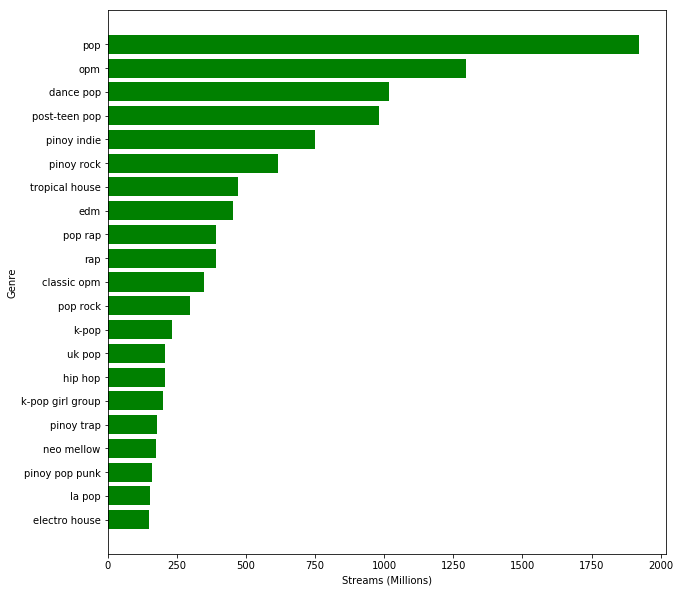

**(10 points)**

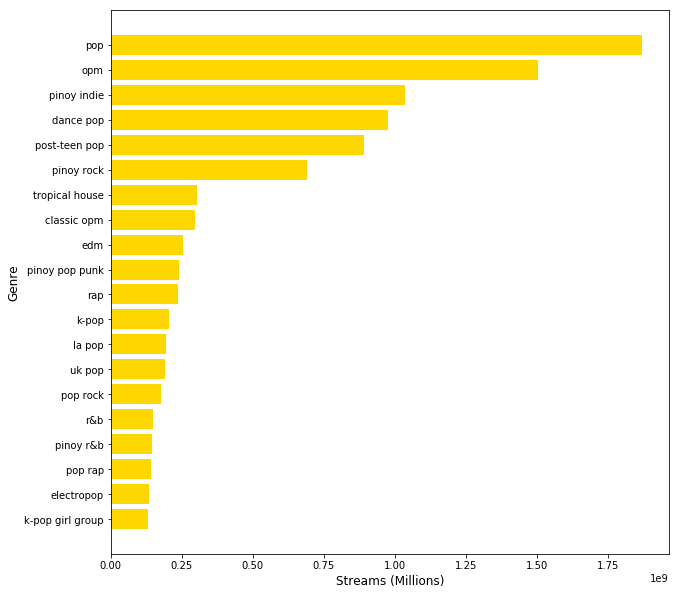

In [777]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write your code below

top_20 = list(genre_df.head(20).loc[:,"genre"])
top_20_count = list(genre_df.head(20).loc[:,"count"])



title_font = {"fontfamily":"Lato", "fontsize":24}
label_font = {"fontfamily":"Lato", "fontsize":12}


ax.barh(width=top_20_count, y=top_20, color="Gold")
ax.set_xlabel("Streams (Millions)", **label_font)
ax.set_ylabel("Genre", **label_font)
ax.invert_yaxis()







#### 4b) Who are the most popular Artists in the Philippines (as measured by stream count) in June 2019?

Plot a **horizontal bar**.

The resulting plot should look something like this:

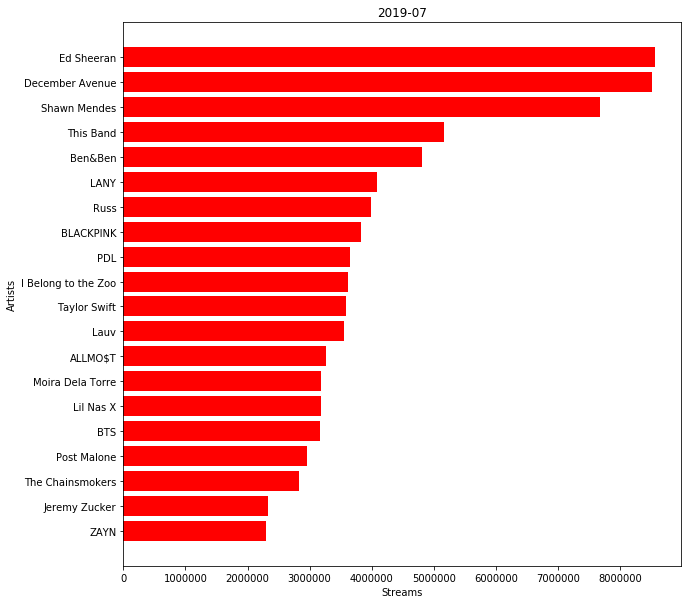

**(10 points)**

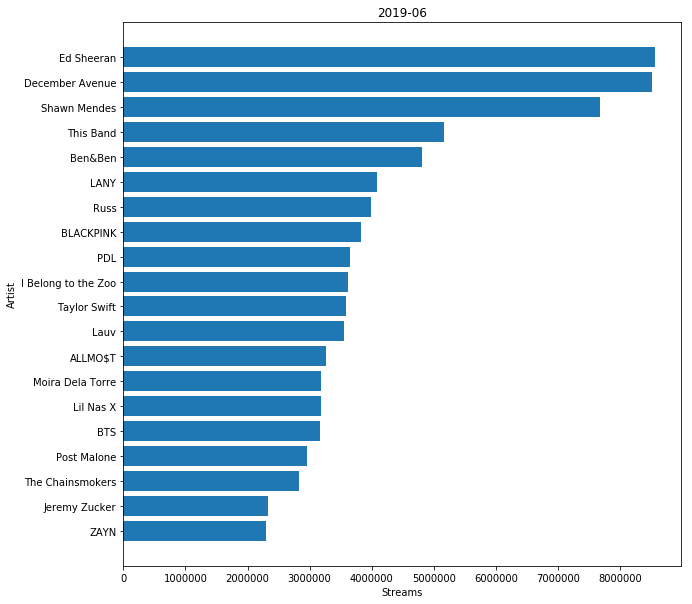

In [793]:
import matplotlib.pyplot as plt

chart_month = "2019-06"

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write code below
## ------------------------


june2019_df = artist_streams_df.query("chart_month=='2019-07'")
june2019_df = (june2019_df.sort_values(by=["Streams"], ascending=False)).head(20)

artist = list(june2019_df.loc[:,"Artist"])
streams = list(june2019_df.loc[:,"Streams"])

ax.barh(width=streams,y=artist)
ax.invert_yaxis()
ax.set_title(chart_month)
ax.set_ylabel("Artist")
ax.set_xlabel("Streams")

plt.show()


#### 4c) What are the average features of the top 10 artists by total stream count?

There are no plots nor graphs in this number. Only display the contents of the resulting dataframe.

Revisit the `mean_audio_features_df` dataframe.  

Only include the top 10 artists by total stream count.  

Hint: Use the `total_streams_per_artist_df` dataframe as basis for your filtering.

Hint: Consider using the `DataFrame.isin(...)` method. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html



**(10 points)**

In [769]:
total_streams_per_artist_df.head(10).loc[:,"Artist"]

38         December Avenue
257                   LANY
293                Ben&Ben
208          Ariana Grande
254              This Band
221       Moira Dela Torre
201    I Belong to the Zoo
190              BLACKPINK
260             Ed Sheeran
76             Post Malone
Name: Artist, dtype: object

In [770]:
top_10 = list(total_streams_per_artist_df.head(10).loc[:, "Artist"])
mean_audio_features_df[mean_audio_features_df["Artist"].isin([i for i in top_10])]

Artist  danceability  instrumentalness  liveness   loudness  \
228          Post Malone      0.721909      6.471591e-07  0.114934  -6.567761   
32             BLACKPINK      0.688838      1.094808e-04  0.180181  -3.301558   
25         Ariana Grande      0.685175      6.365656e-04  0.177576  -6.263399   
164                 LANY      0.664252      1.171483e-03  0.142292  -7.953280   
88            Ed Sheeran      0.638448      1.919782e-04  0.115834  -7.071730   
110  I Belong to the Zoo      0.602156      0.000000e+00  0.190533  -8.468911   
40               Ben&Ben      0.516291      3.741917e-05  0.134859  -9.314495   
80       December Avenue      0.502028      3.861692e-06  0.141317  -5.040302   
278            This Band      0.500404      3.066717e-04  0.113273  -9.326040   
208     Moira Dela Torre      0.462023      2.048261e-04  0.178408 -10.057548   

         mode  speechiness       tempo   valence  
228  0.772727     0.084250  125.521517  0.503568  
32   0.476923     0.088276  124.220035  0.459912  
25   0.585551     0.100912  121.955624  0.373224  
164  0.761388     0.081782  104.191332  0.373729  
88   0.850806     0.044580   98.888218  0.374960  
110  1.000000     0.029338  132.383489  0.350533  
40   1.000000     0.035579  110.039529  0.328333  
80   0.836923     0.030816  139.310637  0.241929  
278  1.000000     0.034455  119.414768  0.249172  
208  0.950192     0.035486  129.792437  0.239077

In [81]:
## write your code below
## remnants from a previous test shown below for your reference
## ----------------------








Artist  danceability  liveness  instrumentalness  loudness  \
48   I Belong to the Zoo      0.644144  0.137991          0.000741 -6.630278   
83             This Band      0.629253  0.159965          0.000426 -5.812404   
85       December Avenue      0.628997  0.137791          0.001221 -6.678929   
96            Ed Sheeran      0.625694  0.153446          0.000421 -7.570371   
112     Moira Dela Torre      0.622172  0.145804          0.001324 -7.022598   
113                 LANY      0.622152  0.134362          0.000711 -7.016731   
155            BLACKPINK      0.610681  0.139826          0.000897 -7.183369   
166        Ariana Grande      0.607673  0.151281          0.000641 -7.143418   
168          Post Malone      0.607415  0.134897          0.000432 -7.277227   
183              Ben&Ben      0.600874  0.133243          0.000565 -6.575432   

     speechiness   valence      mode  
48      0.063766  0.407811  0.811111  
83      0.102412  0.443444  0.737374  
85      0.063375  0.409468  0.781538  
96      0.056863  0.406998  0.838710  
112     0.063144  0.409754  0.793103  
113     0.068505  0.412306  0.778742  
155     0.061725  0.402831  0.819231  
166     0.070895  0.392934  0.787072  
168     0.068336  0.407632  0.772727  
183     0.084477  0.412601  0.752427

#### 4d) Which are the 10 most danceable artists who have made it in the Top 200 charts?

Plot a horizontal bar graph of these top 10 Danceable Artists.

Your resulting plot should look something like this.

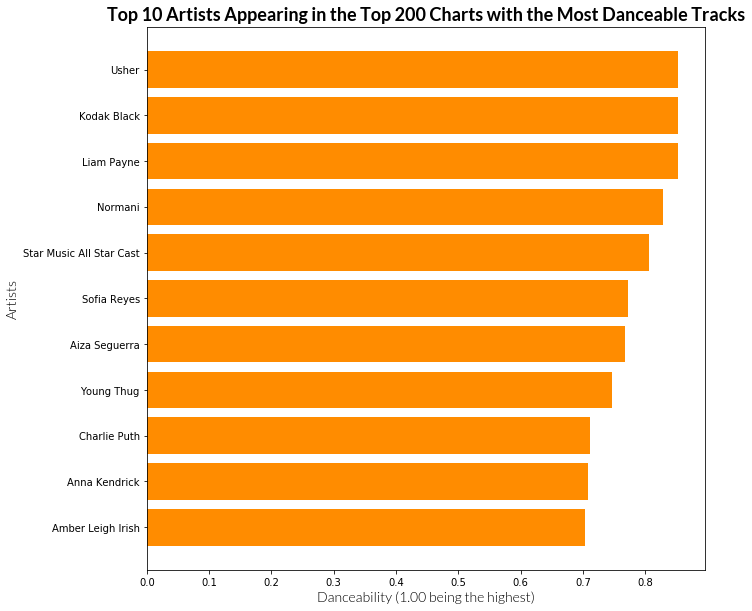

**(10 points)**

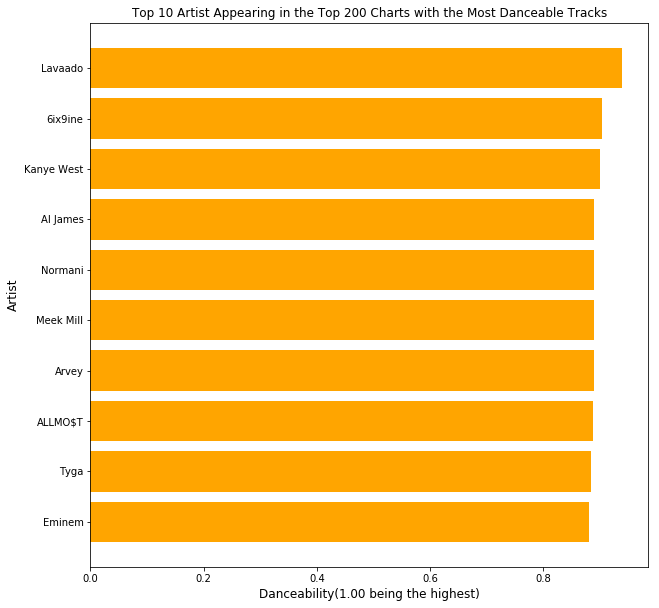

In [772]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

title_font = {"fontweight":"bold", "fontfamily":"Lato", "fontsize":18}
label_font = {"fontfamily":"Lato", "fontsize":14}

## write code below
## -----------------


top_10_dance = list(mean_audio_features_df.head(10).loc[:,"Artist"])
top_10_dc = list(mean_audio_features_df.head(10).loc[:,"danceability"])

ax.set_title("Top 10 Artist Appearing in the Top 200 Charts with the Most Danceable Tracks")

title_font = {"fontfamily":"Lato", "fontsize":24}
label_font = {"fontfamily":"Lato", "fontsize":12}


ax.barh(width=top_10_dc, y=top_10_dance, color="Orange")
ax.set_xlabel("Danceability(1.00 being the highest)", **label_font)
ax.set_ylabel("Artist", **label_font)
ax.invert_yaxis()






#### 4e) Staying power

No plots/graphs for this question. Simply dump the output below the cell containing your code.

Which artists stayed for 52 weeks in the charts? 

Prepare a new dataframe `artist_stay_df` that shows the number of periods (weeks) each Artist was included in the Top 200 Charts.

**Hint:** It's possible that one artist can have several tracks in the Top 200 all at at the same time, but we need to count this stay only once. Use `DataFrame.drop_duplicates()` to get unique rows.

Also try to sort by "weeks" in descending order.

**(10 points)**

In [ ]:
tally = {}

artist_set = list(set(i for i in df.loc[:, "Artist"]))
artists = [i for i in df.loc[:, "Artist"]]

for i in artist_set:
    tally[i] = 0
    
for i in artists:
    tally[i] += 1
    
tally

In [781]:
## write code below
## remnants from a previous test shown below for your reference
## ---------------------




artist_stay_df = pd.DataFrame()
artist_stay_df["Artist"] = [i for i in tally]
total = []

for i in tally:
    total.append(tally[i])
    
artist_stay_df["weeks"] = [i for i in total]
artist_stay_df = artist_stay_df.sort_values(by="weeks",ascending=False)
artist_stay_df







Artist  weeks
257                      LANY    461
38            December Avenue    325
208             Ariana Grande    263
221          Moira Dela Torre    261
190                 BLACKPINK    260
260                Ed Sheeran    248
293                   Ben&Ben    206
76                Post Malone    176
133                    Khalid    169
158                      Lauv    167
301          The Chainsmokers    155
227                  Maroon 5    150
112          Silent Sanctuary    148
222                  Dua Lipa    134
269                 Callalily    133
36                       Hale    132
153                Bruno Mars    124
122          Hailee Steinfeld    123
304                       SUD    109
215        Michael Pangilinan    108
102                     Bazzi    106
100              South Border    106
297                Jason Mraz    104
250                       BTS    104
246                 Sam Smith    101
50               James Arthur    100
254                 This Band     99
174          Parokya Ni Edgar     99
292                Marshmello     94
243              Shawn Mendes     93
..                        ...    ...
120               King Badger      1
204                  Band Aid      1
19                  Lil Wayne      1
137              The Ronettes      1
195         Sabrina Carpenter      1
69             Britney Spears      1
75              Nat King Cole      1
214              Charlie Puth      1
57                Bing Crosby      1
56                 Will Smith      1
54                  Burl Ives      1
171                     R3HAB      1
170                    J Boog      1
168         Amber Leigh Irish      1
233   Girls' Generation-Oh!GG      1
234                Nick Jonas      1
166               Kodak Black      1
236               Dean Martin      1
45                 Perry Como      1
44             Paul McCartney      1
241           Angeline Quinto      1
164            Colbie Caillat      1
40              Frank Sinatra      1
35                      Usher      1
249           Reese Lansangan      1
251            Brett Eldredge      1
146                    Gloc 9      1
143  Star Music All Star Cast      1
270                   Beyoncé      1
156               John Lennon      1

[305 rows x 2 columns]